In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras. layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [2]:
df= web.DataReader('LLY', data_source='yahoo', start='2012-01-01', end='2020-05-31')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,42.029999,41.660000,41.950001,41.799999,6905200.0,32.314346
2012-01-04,41.849998,40.669998,41.849998,40.709999,10240800.0,31.471693
2012-01-05,40.369999,39.250000,39.430000,40.299999,14691100.0,31.154736
2012-01-06,40.209999,39.810001,39.970001,39.880001,6329600.0,30.830042
2012-01-09,39.939999,39.599998,39.939999,39.810001,12353900.0,30.775930
...,...,...,...,...,...,...
2020-05-22,152.559998,150.169998,152.220001,151.160004,2355000.0,151.160004
2020-05-26,151.759995,147.160004,151.110001,147.960007,5013400.0,147.960007
2020-05-27,148.169998,143.619995,148.169998,145.699997,5376100.0,145.699997


/Users/henrigaspard/opt/anaconda3/envs/qqdata/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


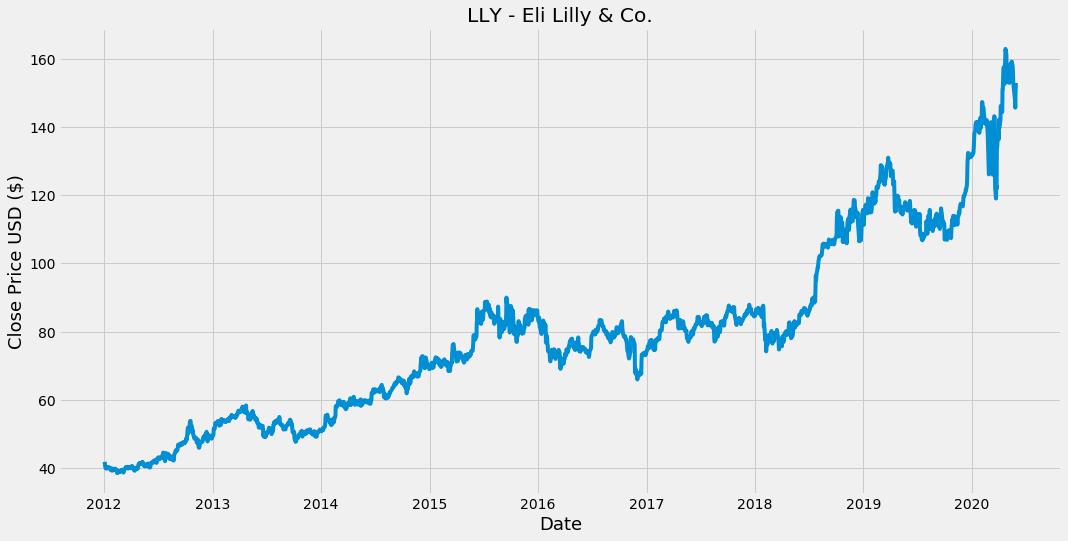

In [3]:
#df.shape
plt.figure(figsize=(16,8))
plt.title('LLY - Eli Lilly & Co.')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [4]:
data = df.filter(['Close'])
#convert 
dataset = data.values
#train the model
training_data_len = math.ceil (len(dataset) * 0.8)
#training_data_len

#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
#scaled_data

train_data = scaled_data[0:training_data_len , :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.02659915, 0.0178399 , 0.01454514, 0.01117004, 0.01060752,
       0.01478624, 0.01197363, 0.01358083, 0.01165218, 0.01237542,
       0.01358083, 0.01350045, 0.01060752, 0.00731276, 0.00900031,
       0.01125038, 0.00763418, 0.00570555, 0.00610735, 0.010045  ,
       0.01052714, 0.00891994, 0.00819669, 0.00932176, 0.00811635,
       0.01036642, 0.00827707, 0.00658952, 0.00289293, 0.        ,
       0.00064286, 0.00184828, 0.00618769, 0.00208935, 0.00265186,
       0.00241079, 0.00450014, 0.00554483, 0.00731276, 0.006027  ,
       0.00691094, 0.00795562, 0.00514304, 0.00120538, 0.00297331,
       0.00562518, 0.00859852, 0.01052714, 0.01350045, 0.0142237 ,
       0.01438442, 0.01374156, 0.01470587, 0.01229507, 0.01173256,
       0.01060752, 0.01108966, 0.01430407, 0.0142237 , 0.01462552])]
[0.011812901899338646]



In [5]:
#Convert the x_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data, because the model expects 3 and as you can see here, there are only two
#x_train.shape

# Now, you can wee three, don't you?
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
#x_train.shape

#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1632/1632 [==============================] - 194s 119ms/step - loss: 5.7178e-04


In [7]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#create the data sets  x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

#Convert the data to a numpy array
x_test = np.array(x_test)
#x_test.shape

#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
#x_test.shape

#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

#Evaluate our model, getting the root mean squared error (RMSE) zero means exact, so the closer to zero, the better
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

5.3310189574040985

/Users/henrigaspard/opt/anaconda3/envs/qqdata/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


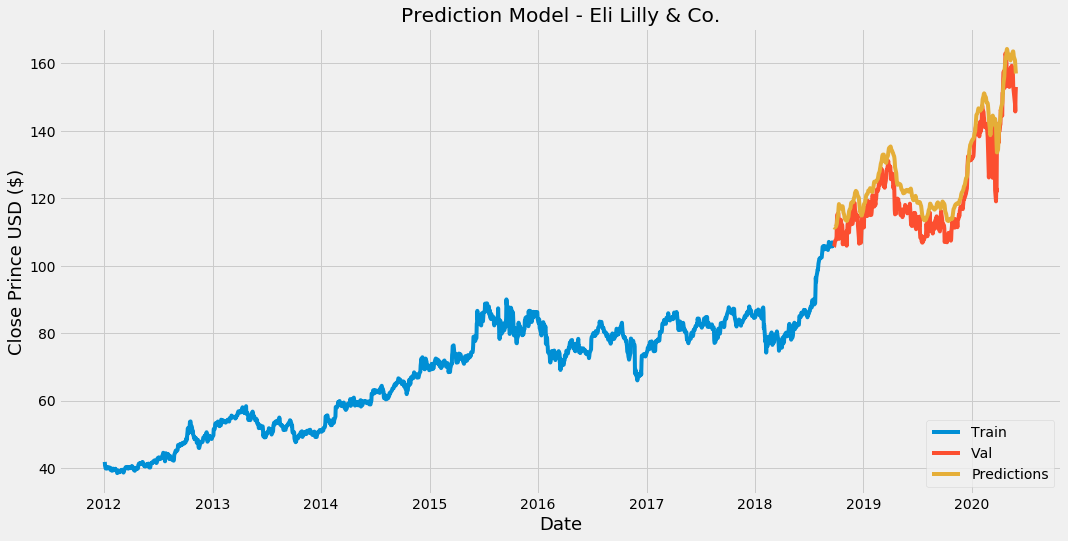

In [8]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Prediction Model - Eli Lilly & Co.')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Prince USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.savefig('pred_lilly.png')
plt.show()

In [9]:
#Show the valid and predicted prices
valid.to_csv('lilly.csv', index = False)
valid

,Close,Predictions
Date,,
2018-09-24,105.589996,111.389282
2018-09-25,105.699997,111.333153
2018-09-26,106.309998,111.261322
2018-09-27,106.690002,111.272064
2018-09-28,107.309998,111.367905
...,...,...
2020-05-22,151.160004,161.958496
2020-05-26,147.960007,160.896606
2020-05-27,145.699997,159.473480


In [10]:
#Predic the closing price Get the quote
apple_quote = web.DataReader ('LLY', data_source='yahoo', start='2012-01-01', end='2020-06-01')
#create new dataframe
new_df = apple_quote.filter(['Close'])
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the last 60 days to the X_test list
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[157.0189]]


In [11]:
apple_quote2 = web.DataReader ('LLY', data_source='yahoo', start='2020-06-01', end='2020-06-01')
print(apple_quote2['Close'])

Date
2020-06-01    152.449997
Name: Close, dtype: float64
